In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, chi2, RFE, f_classif, mutual_info_classif
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from sklearn.tree import DecisionTreeClassifier
from itertools import compress
from sklearn.svm import SVR
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# **Loading The Dataset**

In [ ]:
heart_data = pd.read_excel('Heart Attack FD Data.xlsx',usecols=['TIME','Event','Gender','Smoking','Diabetes','BP','Anaemia','Age','Ejection.Fraction','Sodium','Creatinine','Pletelets','CPK'])
heart_data = heart_data[['TIME','Age','Ejection.Fraction','Sodium','Creatinine','Pletelets','CPK','Gender','Smoking','Diabetes','Anaemia','BP','Event']]
heart_data

,TIME,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK,Gender,Smoking,Diabetes,Anaemia,BP,Event
0,97,43.0,50,135,1.30,237000.00,358,0,0,0,1,0,0
1,180,73.0,30,142,1.18,160000.00,231,1,1,1,1,0,0
2,31,70.0,20,134,1.83,263358.03,582,1,1,0,0,1,1
3,87,65.0,25,141,1.10,298000.00,305,1,0,0,1,0,0
4,113,64.0,60,137,1.00,242000.00,1610,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,250,45.0,55,132,1.00,543000.00,582,0,0,1,0,0,0
295,244,51.0,40,134,0.90,221000.00,582,0,0,1,0,0,0
296,14,45.0,14,127,0.80,166000.00,582,1,0,0,0,0,1
297,80,60.0,45,133,1.00,297000.00,897,1,0,1,0,0,0


# **Correlation Matrix**

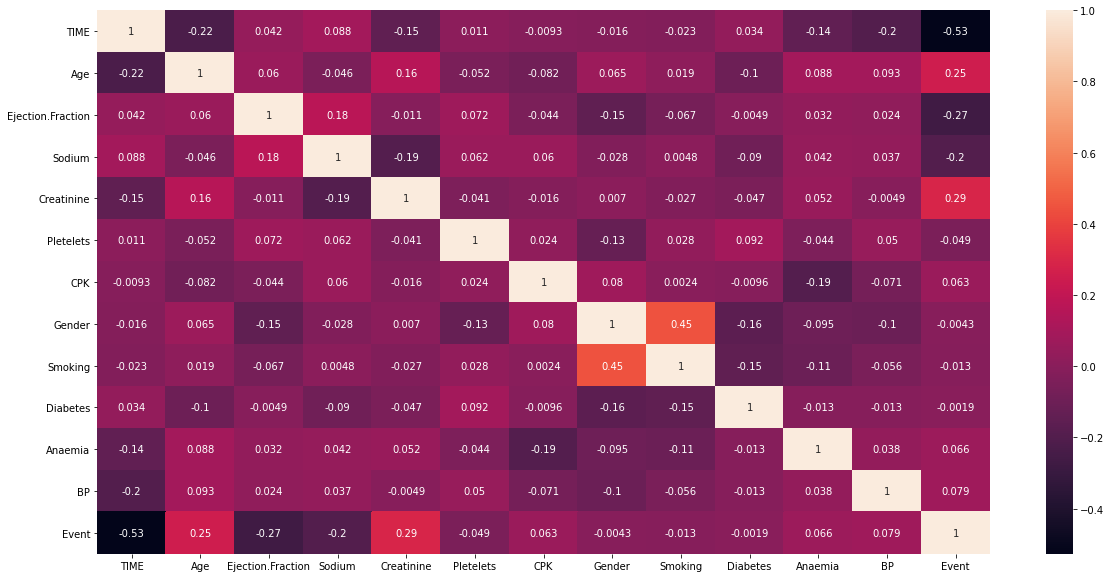

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(heart_data.iloc[:,:].corr(),annot=True)

# **Confusion Matrix Function**

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# **KNN Function**

In [ ]:
def cal_KNN(k_ranges,x_train,y_train,x_test,y_test):

  train_set_accuracies = []
  test_set_accuracies = []
  test_set_predictions = []

  best_k = None
  best_score = None

  for k in k_ranges:
    neigh = KNeighborsClassifier(n_neighbors = k)
    neigh.fit(x_train,y_train)

    yhat=neigh.predict(x_test)

    train_set_accuracies.append(metrics.accuracy_score(y_train, neigh.predict(x_train)))
    test_set_accuracies.append(metrics.accuracy_score(y_test, yhat))
    test_set_predictions.append(yhat)

  for i in range(len(k_ranges)):
    if (best_k == None):
      best_k = k_ranges[i]
      best_score = test_set_accuracies[i]
    elif (best_score < test_set_accuracies[i]):
      best_k = k_ranges[i]
      best_score = test_set_accuracies[i]
    print('\n\nAt K = {} :\nTrain Acc: {} === Test Acc: {}'.format(k_ranges[i],train_set_accuracies[i],test_set_accuracies[i]))

  print('\nBest Performing Value of K is: {}'.format(best_k))

  return best_k, train_set_accuracies, test_set_accuracies, test_set_predictions

# **KNN K Performance Plot Train and Test**

In [ ]:
def plot_k_performance(k_ranges,train_set_accuracies,test_set_accuracies):
  ax = sns.lineplot(x = k_ranges,y = train_set_accuracies, label = 'Train Set Accuracy')
  ax.set(xlabel = 'Values Of K',ylabel = 'Accuracy At K',title = 'K Performance Plot')
  sns.lineplot(x = k_ranges,y = test_set_accuracies, label = 'Test Set Accuracy')
  plt.ylim(0,1)

# **Naive Bayes Function**

In [ ]:
def calc_NaiveBayes(x_train, y_train, x_test, y_test):
  gnb = GaussianNB()

  gnb.fit(x_train,y_train)
  yhat = gnb.predict(x_test)

  train_set_accuracy = metrics.accuracy_score(y_train, gnb.predict(x_train))
  test_set_accuracy = metrics.accuracy_score(y_test, yhat)

  print("Train set Accuracy: ", train_set_accuracy)
  print("Test set Accuracy: ", test_set_accuracy)

  return train_set_accuracy, test_set_accuracy, yhat

# **Computing Accuracy With Normalization**

## **Calculating Accuracy Without Feature Selection**

In [ ]:
def min_max_normalize(df):
  features = df.columns.to_list()[0:-1]
  for col in features:
    df[col] = ( ( df[col] - min(df[col]) ) / ( max(df[col]) - min(df[col]) ) )
  return df.copy()  

heart_data = min_max_normalize(heart_data)
heart_data

,TIME,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK,Gender,Smoking,Diabetes,Anaemia,BP,Event
0,0.330961,0.054545,0.545455,0.628571,0.089888,0.256880,0.042740,0.0,0.0,0.0,1.0,0.0,0
1,0.626335,0.600000,0.242424,0.828571,0.076404,0.163535,0.026537,1.0,1.0,1.0,1.0,0.0,0
2,0.096085,0.545455,0.090909,0.600000,0.149438,0.288833,0.071319,1.0,1.0,0.0,0.0,1.0,1
3,0.295374,0.454545,0.166667,0.800000,0.067416,0.330828,0.035979,1.0,0.0,0.0,1.0,0.0,0
4,0.387900,0.436364,0.696970,0.685714,0.056180,0.262941,0.202475,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.875445,0.090909,0.621212,0.542857,0.056180,0.627834,0.071319,0.0,0.0,1.0,0.0,0.0,0
295,0.854093,0.200000,0.393939,0.600000,0.044944,0.237483,0.071319,0.0,0.0,1.0,0.0,0.0,0
296,0.035587,0.090909,0.000000,0.400000,0.033708,0.170809,0.071319,1.0,0.0,0.0,0.0,0.0,1
297,0.270463,0.363636,0.469697,0.571429,0.056180,0.329616,0.111508,1.0,0.0,1.0,0.0,0.0,0


In [ ]:
X,Y = heart_data.iloc[:,:-1], heart_data['Event']

### **Performing Train Test split**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(209, 12) (90, 12) (209,) (90,)


In [ ]:
heart_data

,TIME,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK,Gender,Smoking,Diabetes,Anaemia,BP,Event
0,0.330961,0.054545,0.545455,0.628571,0.089888,0.256880,0.042740,0.0,0.0,0.0,1.0,0.0,0
1,0.626335,0.600000,0.242424,0.828571,0.076404,0.163535,0.026537,1.0,1.0,1.0,1.0,0.0,0
2,0.096085,0.545455,0.090909,0.600000,0.149438,0.288833,0.071319,1.0,1.0,0.0,0.0,1.0,1
3,0.295374,0.454545,0.166667,0.800000,0.067416,0.330828,0.035979,1.0,0.0,0.0,1.0,0.0,0
4,0.387900,0.436364,0.696970,0.685714,0.056180,0.262941,0.202475,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.875445,0.090909,0.621212,0.542857,0.056180,0.627834,0.071319,0.0,0.0,1.0,0.0,0.0,0
295,0.854093,0.200000,0.393939,0.600000,0.044944,0.237483,0.071319,0.0,0.0,1.0,0.0,0.0,0
296,0.035587,0.090909,0.000000,0.400000,0.033708,0.170809,0.071319,1.0,0.0,0.0,0.0,0.0,1
297,0.270463,0.363636,0.469697,0.571429,0.056180,0.329616,0.111508,1.0,0.0,1.0,0.0,0.0,0


### **KNN**

In [ ]:
#Train Model and Predict  

k_ranges = [1,2,3,4,5,6,7,8,9,10]

best_k, train_set_accuracies, test_set_accuracies, test_set_predictions = cal_KNN(k_ranges, x_train, y_train, x_test, y_test)



At K = 1 :
Train Acc: 1.0 === Test Acc: 0.6888888888888889


At K = 2 :
Train Acc: 0.7990430622009569 === Test Acc: 0.7222222222222222


At K = 3 :
Train Acc: 0.84688995215311 === Test Acc: 0.6888888888888889


At K = 4 :
Train Acc: 0.7607655502392344 === Test Acc: 0.7


At K = 5 :
Train Acc: 0.7703349282296651 === Test Acc: 0.7222222222222222


At K = 6 :
Train Acc: 0.7320574162679426 === Test Acc: 0.7222222222222222


At K = 7 :
Train Acc: 0.7511961722488039 === Test Acc: 0.7


At K = 8 :
Train Acc: 0.7272727272727273 === Test Acc: 0.7111111111111111


At K = 9 :
Train Acc: 0.7464114832535885 === Test Acc: 0.7111111111111111


At K = 10 :
Train Acc: 0.7177033492822966 === Test Acc: 0.7111111111111111

Best Performing Value of K is: 2


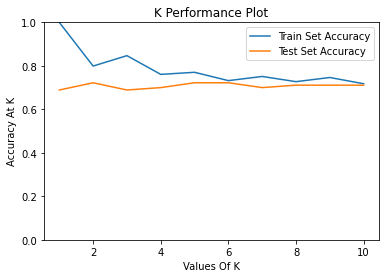

In [ ]:
plot_k_performance(k_ranges,train_set_accuracies,test_set_accuracies)

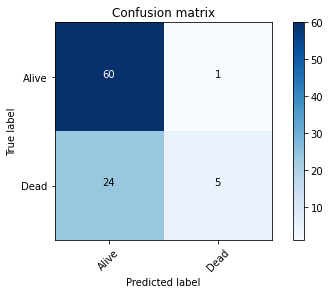

In [ ]:
cnf_matrix = confusion_matrix(y_test,test_set_predictions[best_k-1],labels = [0,1])
plot_confusion_matrix(cnf_matrix,classes = ['Alive','Dead'])

### **Naive Bayes**

In [ ]:
train_set_accuracy, test_set_accuracy, yhat = calc_NaiveBayes(x_train,y_train,x_test,y_test)

Train set Accuracy:  0.7511961722488039
Test set Accuracy:  0.8111111111111111


(0.0, 1.0)

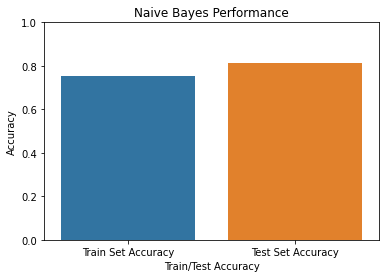

In [ ]:
ax = sns.barplot(x=['Train Set Accuracy','Test Set Accuracy'], y = [train_set_accuracy,test_set_accuracy])
ax.set(xlabel = 'Train/Test Accuracy',ylabel = 'Accuracy',title = 'Naive Bayes Performance')
plt.ylim(0,1)

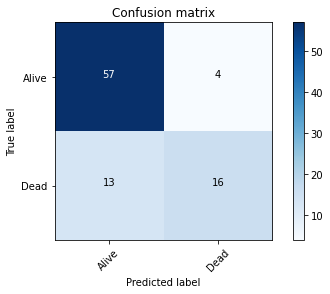

In [ ]:
cnf_matrix = confusion_matrix(y_test,yhat,labels = [0,1])
plot_confusion_matrix(cnf_matrix,classes = ['Alive','Dead'])

## **Calculating Accuracy with Filter Subset Selection Methods**

### **For Numerical Input -> Categorical Output (ANNOVA METHOD)**

In [ ]:
# choosing k = 3 best numerical features

k = 3 

numerical_features = ['TIME','Age','Ejection.Fraction','Sodium','Creatinine','Pletelets','CPK']

best_features_obj = SelectKBest(score_func=f_classif,k = k)

best_features_obj.fit_transform(X[numerical_features],Y)

best_numeric_features = list(compress(numerical_features,list(best_features_obj.get_support())))
print('Best Numerical Features:\n {}'.format(best_numeric_features))

Best Numerical Features:
 ['TIME', 'Ejection.Fraction', 'Creatinine']


### **For Categorical Input -> Categorical Output (Chi Square)**

In [ ]:
# choosing 3 best categorical features

k = 2

categorical_features = ['Gender','Smoking','Diabetes','Anaemia','BP']

best_features_obj = SelectKBest(score_func=chi2,k = k)

best_features_obj.fit_transform(X[categorical_features],Y)

best_categoric_features = list(compress(categorical_features,list(best_features_obj.get_support())))
print('Best Categorical Features:\n {}'.format(best_categoric_features))

Best Categorical Features:
 ['Anaemia', 'BP']


**Combining both best numerical and categorical features into a single dataframe**

In [ ]:
best_features = list()
best_features.extend(best_numeric_features)
best_features.extend(best_categoric_features)

best_data_set = heart_data[best_features]
best_data_set 

,TIME,Ejection.Fraction,Creatinine,Anaemia,BP
0,0.330961,0.545455,0.089888,1.0,0.0
1,0.626335,0.242424,0.076404,1.0,0.0
2,0.096085,0.090909,0.149438,0.0,1.0
3,0.295374,0.166667,0.067416,1.0,0.0
4,0.387900,0.696970,0.056180,0.0,0.0
...,...,...,...,...,...
294,0.875445,0.621212,0.056180,0.0,0.0
295,0.854093,0.393939,0.044944,0.0,0.0
296,0.035587,0.000000,0.033708,0.0,0.0
297,0.270463,0.469697,0.056180,0.0,0.0


### **Checking Performance on both Models**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(best_data_set,Y,test_size=0.3,random_state=1)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(209, 5) (90, 5) (209,) (90,)


In [ ]:
#Train Model and Predict  

k_ranges = [1,2,3,4,5,6,7,8,9,10]

best_k, train_set_accuracies, test_set_accuracies, test_set_predictions = cal_KNN(k_ranges, x_train, y_train, x_test, y_test)



At K = 1 :
Train Acc: 1.0 === Test Acc: 0.7444444444444445


At K = 2 :
Train Acc: 0.8899521531100478 === Test Acc: 0.7666666666666667


At K = 3 :
Train Acc: 0.8995215311004785 === Test Acc: 0.8


At K = 4 :
Train Acc: 0.8899521531100478 === Test Acc: 0.8111111111111111


At K = 5 :
Train Acc: 0.8755980861244019 === Test Acc: 0.8111111111111111


At K = 6 :
Train Acc: 0.8516746411483254 === Test Acc: 0.8111111111111111


At K = 7 :
Train Acc: 0.861244019138756 === Test Acc: 0.8


At K = 8 :
Train Acc: 0.84688995215311 === Test Acc: 0.7888888888888889


At K = 9 :
Train Acc: 0.8660287081339713 === Test Acc: 0.7888888888888889


At K = 10 :
Train Acc: 0.84688995215311 === Test Acc: 0.8

Best Performing Value of K is: 4


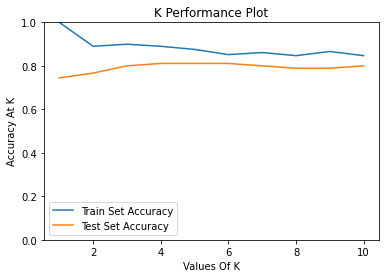

In [ ]:
plot_k_performance(k_ranges,train_set_accuracies,test_set_accuracies)

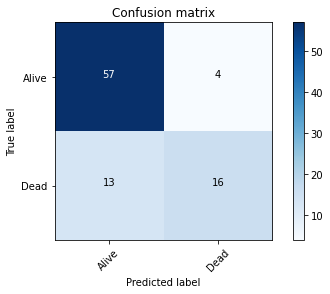

In [ ]:
cnf_matrix = confusion_matrix(y_test,test_set_predictions[best_k-1],labels = [0,1])
plot_confusion_matrix(cnf_matrix,classes = ['Alive','Dead'])

In [ ]:
train_set_accuracy, test_set_accuracy, yhat = calc_NaiveBayes(x_train,y_train,x_test,y_test)

Train set Accuracy:  0.8373205741626795
Test set Accuracy:  0.7888888888888889


(0.0, 1.0)

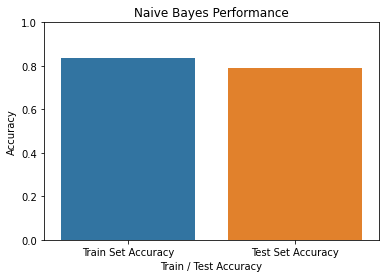

In [ ]:
ax = sns.barplot(x=['Train Set Accuracy','Test Set Accuracy'], y = [train_set_accuracy,test_set_accuracy])
ax.set(xlabel = 'Train / Test Accuracy',ylabel = 'Accuracy',title = 'Naive Bayes Performance')
plt.ylim(0,1)

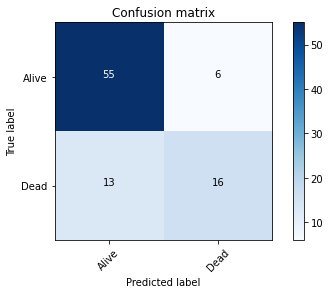

In [ ]:
cnf_matrix = confusion_matrix(y_test,yhat,labels = [0,1])
plot_confusion_matrix(cnf_matrix,classes = ['Alive','Dead'])

## **Calculating Accuracy with wrapper methods**

### **Recursive Feature Elimination (RFE)**

In [ ]:
selector = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=2, step=1)
selector = selector.fit(X, Y)

best_features = X.columns[selector.support_]
best_features

Index(['TIME', 'CPK'], dtype='object')

In [ ]:
best_data_set = heart_data[best_features]
best_data_set

,TIME,CPK
0,0.330961,0.042740
1,0.626335,0.026537
2,0.096085,0.071319
3,0.295374,0.035979
4,0.387900,0.202475
...,...,...
294,0.875445,0.071319
295,0.854093,0.071319
296,0.035587,0.071319
297,0.270463,0.111508


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(best_data_set,Y,test_size=0.3,random_state=1)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(209, 2) (90, 2) (209,) (90,)


In [ ]:
#Train Model and Predict  

k_ranges = [1,2,3,4,5,6,7,8,9,10]

best_k, train_set_accuracies, test_set_accuracies, test_set_predictions = cal_KNN(k_ranges, x_train, y_train, x_test, y_test)



At K = 1 :
Train Acc: 0.9952153110047847 === Test Acc: 0.7333333333333333


At K = 2 :
Train Acc: 0.8899521531100478 === Test Acc: 0.7888888888888889


At K = 3 :
Train Acc: 0.8755980861244019 === Test Acc: 0.7777777777777778


At K = 4 :
Train Acc: 0.8660287081339713 === Test Acc: 0.8111111111111111


At K = 5 :
Train Acc: 0.861244019138756 === Test Acc: 0.8111111111111111


At K = 6 :
Train Acc: 0.84688995215311 === Test Acc: 0.8333333333333334


At K = 7 :
Train Acc: 0.84688995215311 === Test Acc: 0.8333333333333334


At K = 8 :
Train Acc: 0.8421052631578947 === Test Acc: 0.8222222222222222


At K = 9 :
Train Acc: 0.84688995215311 === Test Acc: 0.8222222222222222


At K = 10 :
Train Acc: 0.8373205741626795 === Test Acc: 0.8222222222222222

Best Performing Value of K is: 6


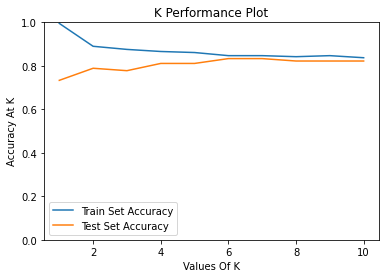

In [ ]:
plot_k_performance(k_ranges,train_set_accuracies,test_set_accuracies)

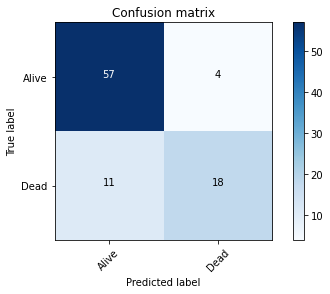

In [ ]:
cnf_matrix = confusion_matrix(y_test,test_set_predictions[best_k-1],labels = [0,1])
plot_confusion_matrix(cnf_matrix,classes = ['Alive','Dead'])

In [ ]:
train_set_accuracy, test_set_accuracy, yhat = calc_NaiveBayes(x_train,y_train,x_test,y_test)

Train set Accuracy:  0.7990430622009569
Test set Accuracy:  0.8111111111111111


(0.0, 1.0)

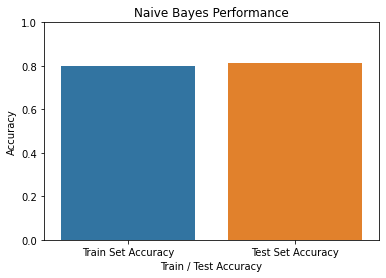

In [ ]:
ax = sns.barplot(x=['Train Set Accuracy','Test Set Accuracy'], y = [train_set_accuracy,test_set_accuracy])
ax.set(xlabel = 'Train / Test Accuracy',ylabel = 'Accuracy',title = 'Naive Bayes Performance')
plt.ylim(0,1)

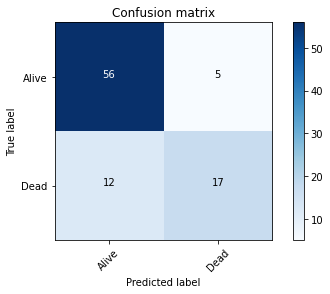

In [ ]:
cnf_matrix = confusion_matrix(y_test,yhat,labels = [0,1])
plot_confusion_matrix(cnf_matrix,classes = ['Alive','Dead'])

## **Hybrid Methods**

### **Trees(Information Gain)**

In [ ]:
n = 2 # 2 best features

model = RandomForestClassifier(n_estimators=332)
model.fit(X,Y)

importances = model.feature_importances_ 
importances

df = pd.DataFrame(data={'Features':X.columns,'Importances':importances})
df.sort_values('Importances',ascending=False,inplace=True)

best_features = df.nlargest(n,'Importances')['Features'].values
best_features

array(['TIME', 'Creatinine'], dtype=object)

In [ ]:
best_data = heart_data[best_features]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(best_data,Y,test_size=0.3,random_state=1)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(209, 2) (90, 2) (209,) (90,)


In [ ]:
#Train Model and Predict  

k_ranges = [1,2,3,4,5,6,7,8,9,10]

best_k, train_set_accuracies, test_set_accuracies, test_set_predictions = cal_KNN(k_ranges, x_train, y_train, x_test, y_test)



At K = 1 :
Train Acc: 1.0 === Test Acc: 0.8


At K = 2 :
Train Acc: 0.8708133971291866 === Test Acc: 0.7888888888888889


At K = 3 :
Train Acc: 0.9043062200956937 === Test Acc: 0.8444444444444444


At K = 4 :
Train Acc: 0.8564593301435407 === Test Acc: 0.7888888888888889


At K = 5 :
Train Acc: 0.8660287081339713 === Test Acc: 0.8555555555555555


At K = 6 :
Train Acc: 0.8516746411483254 === Test Acc: 0.8333333333333334


At K = 7 :
Train Acc: 0.8564593301435407 === Test Acc: 0.8555555555555555


At K = 8 :
Train Acc: 0.8516746411483254 === Test Acc: 0.8333333333333334


At K = 9 :
Train Acc: 0.8516746411483254 === Test Acc: 0.8333333333333334


At K = 10 :
Train Acc: 0.8564593301435407 === Test Acc: 0.8333333333333334

Best Performing Value of K is: 5


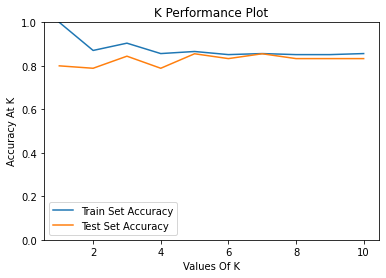

In [ ]:
plot_k_performance(k_ranges,train_set_accuracies,test_set_accuracies)

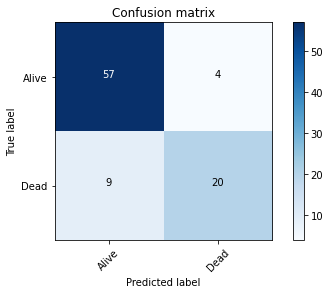

In [ ]:
cnf_matrix = confusion_matrix(y_test,test_set_predictions[best_k-1],labels = [0,1])
plot_confusion_matrix(cnf_matrix,classes = ['Alive','Dead'])

In [ ]:
train_set_accuracy, test_set_accuracy, yhat = calc_NaiveBayes(x_train,y_train,x_test,y_test)

Train set Accuracy:  0.8038277511961722
Test set Accuracy:  0.8222222222222222


(0.0, 1.0)

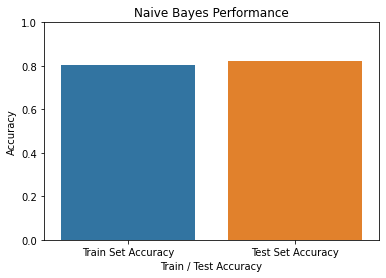

In [ ]:
ax = sns.barplot(x=['Train Set Accuracy','Test Set Accuracy'], y = [train_set_accuracy,test_set_accuracy])
ax.set(xlabel = 'Train / Test Accuracy',ylabel = 'Accuracy',title = 'Naive Bayes Performance')
plt.ylim(0,1)

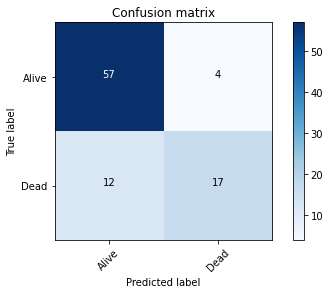

In [ ]:
cnf_matrix = confusion_matrix(y_test,yhat,labels = [0,1])
plot_confusion_matrix(cnf_matrix,classes = ['Alive','Dead'])

# **K-Means Clustering**

**Now finally lets cluster our dataset based on patient age.**

In [ ]:
k = 3 # dividing into 3 clusters

k_means = KMeans(init = "k-means++", n_clusters = 3)

original_df = pd.read_excel('Heart Attack FD Data.xlsx',usecols=['TIME','Event','Gender','Smoking','Diabetes','BP','Anaemia','Age','Ejection.Fraction','Sodium','Creatinine','Pletelets','CPK'])
original_df = original_df[['TIME','Age','Ejection.Fraction','Sodium','Creatinine','Pletelets','CPK','Gender','Smoking','Diabetes','Anaemia','BP','Event']]

k_means.fit(original_df[['Age','TIME','Creatinine']])
labels = k_means.labels_

original_df['Event'] = labels
original_df

,TIME,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK,Gender,Smoking,Diabetes,Anaemia,BP,Event
0,97,43.0,50,135,1.30,237000.00,358,0,0,0,1,0,2
1,180,73.0,30,142,1.18,160000.00,231,1,1,1,1,0,1
2,31,70.0,20,134,1.83,263358.03,582,1,1,0,0,1,0
3,87,65.0,25,141,1.10,298000.00,305,1,0,0,1,0,2
4,113,64.0,60,137,1.00,242000.00,1610,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,250,45.0,55,132,1.00,543000.00,582,0,0,1,0,0,1
295,244,51.0,40,134,0.90,221000.00,582,0,0,1,0,0,1
296,14,45.0,14,127,0.80,166000.00,582,1,0,0,0,0,0
297,80,60.0,45,133,1.00,297000.00,897,1,0,1,0,0,2


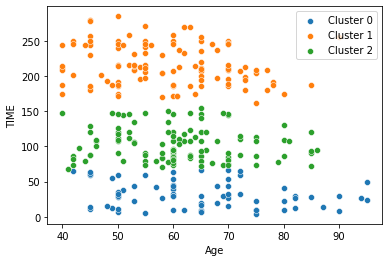

In [ ]:
def plot_k_means_clusters(k_means_data):

    for cluster in np.unique(k_means_data['Event']):
      k_Meancluster = k_means_data[k_means_data['Event'] == cluster]	
      label = 'Cluster {}'.format(int(cluster))
      ax = sns.scatterplot(x=k_Meancluster.loc[:,'Age'],y=k_Meancluster.loc[:,'TIME'],label=label)        
    plt.show()

plot_k_means_clusters(original_df)

# **Calculating Accuracy using PCA**

In [ ]:
# PCA function
def extract_features(features: pd.DataFrame, nfeatures: int):
        """
          This function reduces the dimensions of the dataset to the limit specified by user.
          The specified dimensions are returned as Principal components.
        """
        pca_obj = PCA(n_components=nfeatures, random_state=10)
        reduced_features = pca_obj.fit_transform(features)
        column_list = []
        for i in range(reduced_features.shape[1]):
            column_list.append('PC'+str(i+1))

        reduced_features = pd.DataFrame(reduced_features, columns=column_list)
        return reduced_features


pca_features = extract_features(heart_data,5)
pca_features

,PC1,PC2,PC3,PC4,PC5
0,0.522514,-0.067845,-0.883362,-0.072644,-0.330101
1,-0.367885,-0.194779,-0.312471,0.772475,0.737257
2,-0.702496,0.896808,0.739548,-0.372375,0.008413
3,-0.120140,0.128385,-0.807180,0.153404,-0.098240
4,-0.386190,-0.371169,-0.164853,-0.241823,-0.445685
...,...,...,...,...,...
294,0.590602,-1.028617,0.187773,0.054665,-0.162675
295,0.577539,-0.988666,0.199415,0.073182,-0.180072
296,-0.309105,0.363477,0.370488,0.164813,-0.860024
297,-0.027618,-0.673986,0.332734,0.320886,0.039305


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(pca_features,Y,test_size=0.3,random_state=1)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(209, 5) (90, 5) (209,) (90,)


In [ ]:
#Train Model and Predict  

k_ranges = [3,5,7,9]

best_k, train_set_accuracies, test_set_accuracies, test_set_predictions = cal_KNN(k_ranges, x_train, y_train, x_test, y_test)



At K = 3 :
Train Acc: 1.0 === Test Acc: 1.0


At K = 5 :
Train Acc: 0.9952153110047847 === Test Acc: 1.0


At K = 7 :
Train Acc: 0.9952153110047847 === Test Acc: 1.0


At K = 9 :
Train Acc: 1.0 === Test Acc: 1.0

Best Performing Value of K is: 3


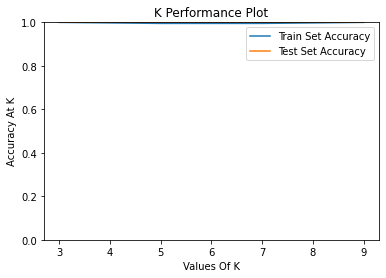

In [ ]:
plot_k_performance(k_ranges,train_set_accuracies,test_set_accuracies)

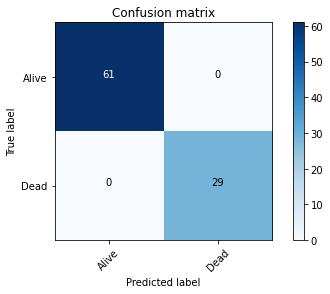

In [ ]:
cnf_matrix = confusion_matrix(y_test,test_set_predictions[best_k-1],labels = [0,1])
plot_confusion_matrix(cnf_matrix,classes = ['Alive','Dead'])

In [ ]:
train_set_accuracy, test_set_accuracy, yhat = calc_NaiveBayes(x_train,y_train,x_test,y_test)

Train set Accuracy:  1.0
Test set Accuracy:  1.0


(0.0, 1.0)

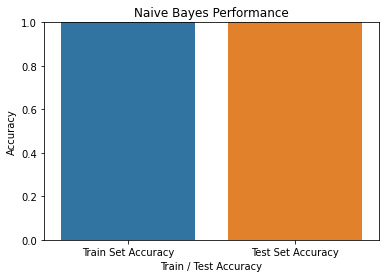

In [ ]:
ax = sns.barplot(x=['Train Set Accuracy','Test Set Accuracy'], y = [train_set_accuracy,test_set_accuracy])
ax.set(xlabel = 'Train / Test Accuracy',ylabel = 'Accuracy',title = 'Naive Bayes Performance')
plt.ylim(0,1)

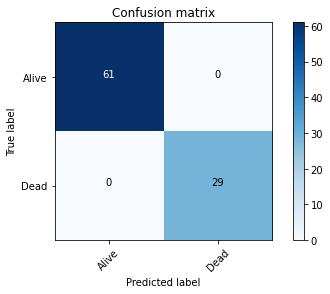

In [ ]:
cnf_matrix = confusion_matrix(y_test,yhat,labels = [0,1])
plot_confusion_matrix(cnf_matrix,classes = ['Alive','Dead'])